In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
figsize_x = 14
figsize_y = 6


In [21]:
data= "C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\home_price.csv"

In [22]:
home_price= pd.read_csv(data)


In [23]:
gp_state=home_price.groupby('State').median()

gp_state.columns=["Median Home Price"]
gp_state.head()

,Median Home Price
State,
AK,310387.50
AL,133891.67
AR,127237.50
AZ,240816.67
CA,560075.00


In [24]:
median_homepricedf = pd.DataFrame(gp_state)
median_homepricedf.to_csv("C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\median_homeprice.csv", index=True, header=True)

In [74]:
totaltaxdf = "C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\Total taxes by State.CSV"
totaltax_bystate = pd.read_csv(totaltaxdf)
totaltax_bystate.head()


,State,Total Tax
0,AL,"11,055,577"
1,AK,"1,641,733"
2,AZ,"16,293,917"
3,AR,"9,843,173"
4,CA,"175,016,884"


In [26]:
tax_homeprice = pd.merge(totaltax_bystate,median_homepricedf, on = 'State')
tax_homeprice.head()


,State,Total Tax,Median Home Price
0,AL,"11,055,577",133891.67
1,AK,"1,641,733",310387.50
2,AZ,"16,293,917",240816.67
3,AR,"9,843,173",127237.50
4,CA,"175,016,884",560075.00


In [27]:
totaltax_medianhomeprice=pd.DataFrame(tax_homeprice)

In [28]:
totaltax_medianhomeprice.to_csv("C:\\Users\\Spring\\Desktop\\The Incredible Quad\\zillow-housing-price\\TotalTax_MedianHomePrice.csv", index=True, header=True)

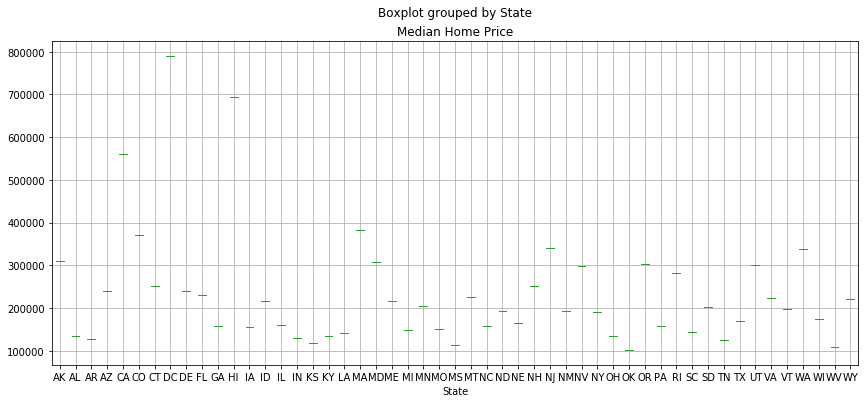

In [30]:
# Create a boxplots to visualize the spread for Median Home Price

gp_state.boxplot("Median Home Price", by="State", figsize=(figsize_x ,figsize_y))

Text(0, 0.5, 'Median Home Price')

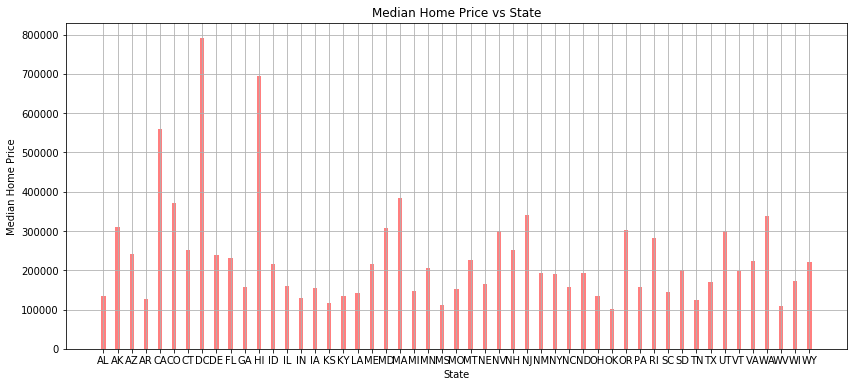

In [50]:
#plot Median HomePrice as bar chart
fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
medianhomepricebar=plt.bar(totaltax_medianhomeprice['State'],totaltax_medianhomeprice['Median Home Price'],
                           color='r',width=0.3, align='center', alpha=0.5)

plt.title('Median Home Price vs State')
ax1.grid()
ax1.set_xlabel("State")
ax1.set_ylabel("Median Home Price")




In [ ]:
#totaltax_medianhomeprice['Total Tax'] = totaltax_medianhomeprice['Total Tax'].str.replace(',','')
#totaltax_medianhomeprice['Total Tax'].str.replace(',','')


Text(0, 0.5, 'Tax rate (Million)')

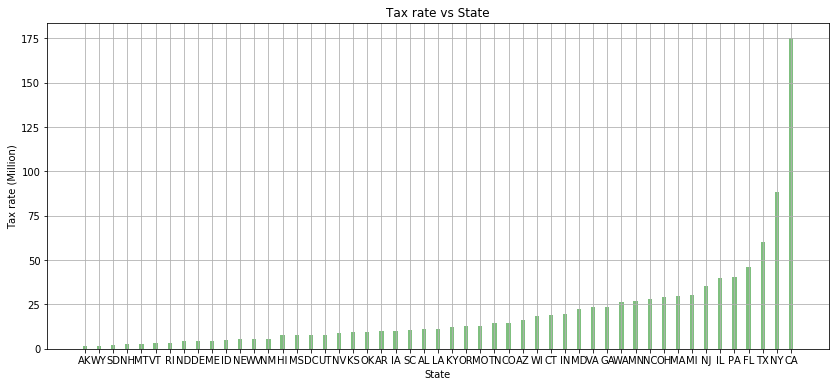

In [111]:
sorttax = totaltax_medianhomeprice.sort_values(by=['Total Tax'])
fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
taxratebar = plt.bar(sorttax['State'] ,sorttax['Total Tax']/1000000 
                     , color='g',width=0.3, align='center', alpha=0.5)
plt.title('Tax rate vs State')


ax1.grid()
ax1.set_xlabel("State",rotation=0)
ax1.set_ylabel("Tax rate (Million)")


In [114]:
sorttax.head()

,State,Total Tax,Median Home Price
1,AK,1641733,310387.500
50,WY,1837401,220241.665
41,SD,1917548,201525.000
29,NH,2920888,250870.835
26,MT,2944827,225283.330


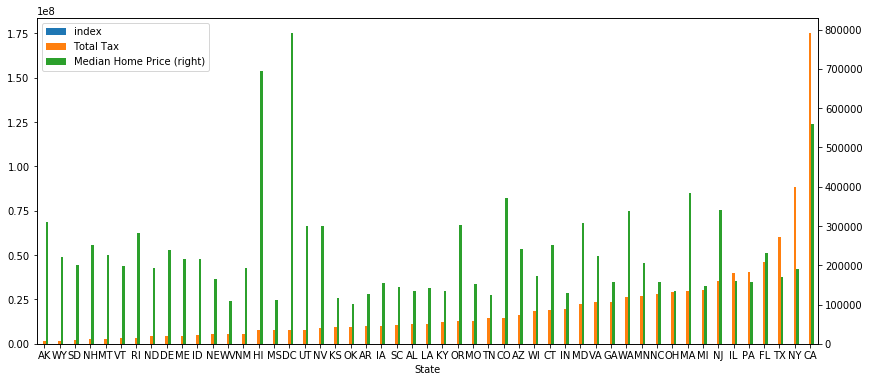

In [120]:
sorttax = sorttax.set_index('State')
gbar=sorttax.plot(kind= 'bar', secondary_y = 'Median Home Price', figsize= (14,6) ,rot =0)
